In [1]:
import pandas as pd
import numpy as np

# read in data and show first rows
trainoutliers = pd.read_csv("traintomedian.csv")
trainoutliers.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-2.159994,-0.446434,1.104681,-0.497672,-0.246560,8,2,3,0,0,0,0,1,3,1
1,-2.159994,-0.445777,0.984523,-0.447192,-0.246560,8,2,1,0,0,0,0,1,3,0
2,-2.159994,-0.435924,0.624050,-0.598634,-0.246560,8,2,3,0,0,0,1,1,3,0
3,-2.159994,-0.333124,-1.298476,0.717744,0.399020,8,2,3,0,0,0,0,8,3,1
4,-2.159994,-0.303564,-1.779108,0.647848,-0.569351,8,2,3,0,0,0,0,11,3,0


In [2]:
# describe the data with basic statistics
trainoutliers.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.042743,-0.241770,-0.000213,-0.219161,-0.208568,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.934056,0.263976,1.000872,0.526869,0.408655,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-1.085899,-1.779108,-1.002478,-0.569351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,-0.159381,0.624050,0.026549,0.076230,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,2.737053,0.691269,1.825628,1.490484,1.044601,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [3]:
# check for null values
trainoutliers.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

In [4]:
# use pandas profiling for basic statistics, correlations, and other basic metrics
from pandas_profiling import ProfileReport
profile = ProfileReport(trainoutliers)
profile.to_file(output_file = "medianchurn.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# dropping features that will no longer be used due to correlation issues
#trainoutliers.drop('feature_5', inplace=True, axis=1)

In [6]:
#trainoutliers.drop('feature_6', inplace=True, axis=1)

In [7]:
trainoutliers.drop('feature_7', inplace=True, axis=1)

In [8]:
trainoutliers.drop('feature_14', inplace=True, axis=1)

In [9]:
# verifying features were dropped
trainoutliers.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_15', 'labels'],
      dtype='object')

In [10]:
# using ANOVA method to determine top features to keep

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

 
X = trainoutliers
y=trainoutliers["labels"]
test=SelectKBest(score_func=f_classif, k=6)
fit = test.fit(X,y)
set_printoptions(precision=10)

features = fit.transform(X)
ANOVA_features_for_training = test.fit_transform(X,y)
ANOVA_support = test.get_support()
ANOVA_feature = X.loc[:,ANOVA_support].columns.tolist()
print("The Dataset features are: ", X.shape[1])
print('The selected features with ANOVA(Filter Method are', len(ANOVA_feature))
print("They are: ")
print(ANOVA_feature)

The Dataset features are:  13
The selected features with ANOVA(Filter Method are 6
They are: 
['feature_1', 'feature_3', 'feature_11', 'feature_13', 'feature_15', 'labels']


C:\Users\13158\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\13158\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


[6.6660497583e-03 1.6786765167e-02 6.5719243417e-03 6.9378546691e-02
 4.0545596622e-03 6.2929307167e-03 5.0315737986e-03 1.6316531749e-04
 1.1409442010e-02 4.9424486729e-03 1.2541247190e-02 3.4033208681e-02
 3.6093494699e-01]


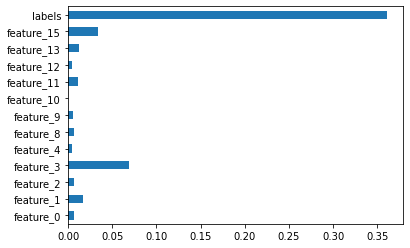

In [11]:
# verifying features to keep with mutual_info_classif
from sklearn.feature_selection import mutual_info_classif

res = mutual_info_classif(X,y)
feat_importance = pd.Series(res, trainoutliers.columns[0:len(trainoutliers.columns)])
feat_importance.plot(kind ='barh')
print(res)

In [12]:
# dropping remaining features
trainoutliers.drop('feature_0', inplace=True, axis=1)
trainoutliers.drop('feature_2', inplace=True, axis=1)
trainoutliers.drop('feature_8', inplace=True, axis=1)
trainoutliers.drop('feature_9', inplace=True, axis=1)
trainoutliers.drop('feature_10', inplace=True, axis=1)
trainoutliers.drop('feature_12', inplace=True, axis=1)

In [13]:
# verifying features were dropped
trainoutliers.columns

Index(['feature_1', 'feature_3', 'feature_4', 'feature_11', 'feature_13',
       'feature_15', 'labels'],
      dtype='object')

### Creating models 



In [14]:
# splitting into train/test data

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(trainoutliers, trainoutliers['labels']):
    train_set = trainoutliers.iloc[train_indices]
    test_set = trainoutliers.iloc[test_indices]

#### Train and Evaluate Decision Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y = train_set['labels']

X_test = test_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y_test = test_set['labels']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))


Results for decision tree on training data
  Default settings
Confusion Matrix
[[23896    56]
 [  123  3051]]
Accuracy is   0.9934011649340116
Precision is  0.9933692954222872
Recall is     0.9934011649340116
F1 is         0.9933705779672962

Results for decision tree on test data
  Default settings
Confusion Matrix
[[5478  511]
 [ 530  263]]
Accuracy is   0.8465054556178119
Precision is  0.8449030036695234
Recall is     0.8465054556178119
F1 is         0.8456964357213727


#### Train and evaluate SVC model 
    

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y = train_set['labels']

X_test = test_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y_test = test_set['labels']

svc_model = SVC()
svc_model.fit(X,y)

y_pred = svc_model.predict(X)
print('Results for svc on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))


Results for svc on training data
  Default settings
Confusion Matrix
[[23695   257]
 [ 2597   577]]
Accuracy is   0.8947872889478728
Precision is  0.876725468134368
Recall is     0.8947872889478728
F1 is         0.8665240188824329

Results for svc on test data
  Default settings
Confusion Matrix
[[5927   62]
 [ 654  139]]
Accuracy is   0.894426422884105
Precision is  0.8761757911379389
Recall is     0.894426422884105
F1 is         0.8654740739701515


### Train and evaluate Random Forest Model 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X = train_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y = train_set['labels']

X_test = test_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y_test = test_set['labels']


rf_model = RandomForestClassifier(criterion = "entropy")
rf_model.fit(X, y)
rf_model.score(X,y)


y_pred = rf_model.predict(X)
print('Results for random forest on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = rf_model.predict(X_test)
print('Results for random forest on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))


Results for random forest on training data
  Default settings
Confusion Matrix
[[23876    76]
 [  106  3068]]
Accuracy is   0.9932905699329057
Precision is  0.9932687240510909
Recall is     0.9932905699329057
F1 is         0.9932767401955825

Results for random forest on test data
  Default settings
Confusion Matrix
[[5727  262]
 [ 531  262]]
Accuracy is   0.8830728398702448
Precision is  0.8666064618061515
Recall is     0.8830728398702448
F1 is         0.8724156585383497


### Train and evaluate Logistic Regression Model 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X = train_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y = train_set['labels']

X_test = test_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y_test = test_set['labels']

lr_model = LogisticRegression(solver='liblinear', random_state=0)
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = lr_model.predict(X_test)
print('Results for linear regression on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))



Results for linear regression on training data
  Default settings
Confusion Matrix
[[23808   144]
 [ 3042   132]]
Accuracy is   0.8825481088254811
Precision is  0.8389121900405186
Recall is     0.8825481088254811
F1 is         0.8365683359941706

Results for linear regression on test data
  Default settings
Confusion Matrix
[[5963   26]
 [ 760   33]]
Accuracy is   0.8841049837805957
Precision is  0.8486460093326407
Recall is     0.8841049837805957
F1 is         0.837529000208744


### Train and evaluate XG boost Model 

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score


X = train_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y = train_set['labels']

X_test = test_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y_test = test_set['labels']

xgb_model = XGBClassifier(learning_rate=0.00001, n_estimators=25, max_depth=1, gamma=0)
xgb_model.fit(X,y)

y_pred = xgb_model.predict(X)
print('Results for xgboost on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = xgb_model.predict(X_test)
print('Results for xg boost on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for xgboost on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3174     0]]
Accuracy is   0.8829904888299049
Precision is  0.7796722033640744
Recall is     0.8829904888299049
F1 is         0.8281212337387479

Results for xg boost on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
